<a href="https://colab.research.google.com/github/ztjohnson23/MAT494/blob/main/hw_4-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy as sym

4.1 Network Analysis

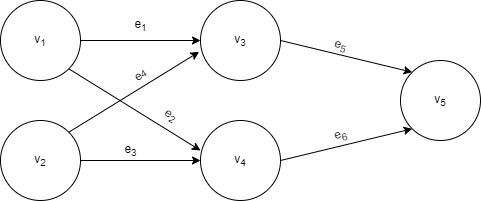

I will use the above diagram as an example of a simple neural net. The graph has 5 nodes, and will be used to create a 5x5 adjacency matrix.

In [79]:
e1,e2,e3,e4,e5,e6 = sym.symbols(['e1', 'e2', 'e3', 'e4', 'e5', 'e6'])

A = [[0,0,e1,e2,0],
     [0,0,e4,e3,0],
     [e1,e4,0,0,e5],
     [e2,e3,0,0,e6],
     [0,0,e5,e6,0]]

In [74]:
# Laplacian Matrix
n = len(A)
L = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]

for i in range(n):
  for j in range(n):
    if (i==j):
      L[i][j] = sum(A[i])
    else:
      L[i][j] = 0-A[i][j]

print('L:\n',np.array(L))

# Incidence Matrix
m = 6
Ig = [[e1**(1/2),e2**(1/2),0,0,0,0],
      [0,0,e3**(1/2),e4**(1/2),0,0],
      [-e1**(1/2),0,0,-e4**(1/2),e5**(1/2),0],
      [0,-e2**(1/2),-e3**(1/2),0,0,e6**(1/2)],
      [0,0,0,0,-e5**(1/2),-e6**(1/2)]] 
print('\nIg:\n',np.array(Ig))  

L:
 [[e1 + e2 0 -e1 -e2 0]
 [0 e3 + e4 -e4 -e3 0]
 [-e1 -e4 e1 + e4 + e5 0 -e5]
 [-e2 -e3 0 e2 + e3 + e6 -e6]
 [0 0 -e5 -e6 e5 + e6]]

Ig:
 [[e1**0.5 e2**0.5 0 0 0 0]
 [0 0 e3**0.5 e4**0.5 0 0]
 [-e1**0.5 0 0 -e4**0.5 e5**0.5 0]
 [0 -e2**0.5 -e3**0.5 0 0 e6**0.5]
 [0 0 0 0 -e5**0.5 -e6**0.5]]


In [75]:
print(Ig @ np.matrix.transpose(np.array(Ig)))

[[e1**1.0 + e2**1.0 0 -e1**1.0 -e2**1.0 0]
 [0 e3**1.0 + e4**1.0 -e4**1.0 -e3**1.0 0]
 [-e1**1.0 -e4**1.0 e1**1.0 + e4**1.0 + e5**1.0 0 -e5**1.0]
 [-e2**1.0 -e3**1.0 0 e2**1.0 + e3**1.0 + e6**1.0 -e6**1.0]
 [0 0 -e5**1.0 -e6**1.0 e5**1.0 + e6**1.0]]


Here, we can confirm that L equals the product of Ig and its transpose.

In [80]:
e = np.ones([5,1])
print(L @ e)

#
x1,x2,x3,x4,x5 = sym.symbols(['x1', 'x2', 'x3', 'x4', 'x5'])
x = np.array([[x1],[x2],[x3],[x4],[x5]])

print('\n',np.matrix.transpose(np.array(Ig)) @ x)

[[0]
 [0]
 [0]
 [0]
 [0]]

 [[e1**0.5*x1 - e1**0.5*x3]
 [e2**0.5*x1 - e2**0.5*x4]
 [e3**0.5*x2 - e3**0.5*x4]
 [e4**0.5*x2 - e4**0.5*x3]
 [e5**0.5*x3 - e5**0.5*x5]
 [e6**0.5*x4 - e6**0.5*x5]]


We can also see that Le = 0 if e = [1,1,1,1,1]. Additionally, ${I_g}^Tx=\begin{pmatrix}\sqrt{e_1}(x_1-x_3)\\\sqrt{e_2}(x_1-x_4)\\\sqrt{e_3}(x_2-x_4)\\\sqrt{e_4}(x_2-x_3)\\\sqrt{e_5}(x_3-x_5)\\\sqrt{e_6}(x_4-x_5)\end{pmatrix}$. 

In [77]:
xTLx = (np.matrix.transpose(x) @ L @ x)[0][0]
print(xTLx)

x1*(-e1*x3 - e2*x4 + x1*(e1 + e2)) + x2*(-e3*x4 - e4*x3 + x2*(e3 + e4)) + x3*(-e1*x1 - e4*x2 - e5*x5 + x3*(e1 + e4 + e5)) + x4*(-e2*x1 - e3*x2 - e6*x5 + x4*(e2 + e3 + e6)) + x5*(-e5*x3 - e6*x4 + x5*(e5 + e6))


In [85]:
# x1=1; x2=3; x3=3; x4=2; x5=1
# e1=1; e2=2; e3=1; e4=1; e5=3; e6=2

xTLx = xTLx.subs({x1:1, x2:3, x3:3, x4:2, x5:1,e1:1, e2:2, e3:1, e4:1, e5:3, e6:2})
print(xTLx)
calculated = 1*(1-3)**2 + 2*(1-2)**2 + 1*(3-2)**2 + 1*(3-3)**2 + 3*(3-1)**2 + 2*(2-1)**2
print(calculated)

21
21


Using random values for x and e, we can see that $x^TLx$ is equal to $\sum_{\{i,j\}}E_{ij}(x_i-x_j)^2$. 